## Goal

CNN으로 handwriting을 인식해보기

In [70]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 글씨가 뭉게져서 보이는 것 같으면 아래의 설정을 통해서 개선할 수 있음
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


In [2]:
x = np.zeros((3,1,2))
print(x)

[[[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]]


### 간단한 이해
<img src=1.jpg width=400>

In [3]:
# 15*3은 원,사각형,삼각형의 총 개수 / 24,24는 각 이미지의 grayscale의 사이즈가 (24,24)이어서
X_train = np.zeros((15*3, 24,24)) 
y_train = np.zeros(15*3)

for i in range(15) :
    img1 = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)
    X_train[i,:,:] = img1
    y_train[i] = 0 # 원은 0으로 나타내겠다
    
    img2 = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)
    X_train[15+i,:,:] = img2
    y_train[15+i] = 1 # 사각형은 1로 나타내겠다
    
    img3 = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)
    X_train[30+i,:,:] = img3
    y_train[30+i] = 2 # 삼각형은 2로 나타내겠다

In [4]:
X_test_easy = np.zeros((5*3, 24,24))
y_test_easy = np.zeros(5*3)

for i in range(5) :    
    img1 = cv2.imread('hard_handwriting_shape/test_easy/circle/circle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[i,:,:] = img1
    y_test_easy[i] = 0 # 원은 0으로 나타내겠다
    
    img2 = cv2.imread('hard_handwriting_shape/test_easy/rectangle/rectangle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[5+i,:,:] = img2
    y_test_easy[5+i] = 1 # 사각형은 1로 나타내겠다

    img3 = cv2.imread('hard_handwriting_shape/test_easy/triangle/triangle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[10+i,:,:] = img3
    y_test_easy[10+i] = 2 # 삼각형은 2로 나타내겠다

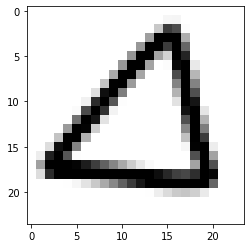

Label:  2.0


In [5]:
plt.imshow(X_test_easy[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test_easy[14])

In [6]:
y_train = to_categorical(y_train) # one-hot encoding
y_test_easy = to_categorical(y_test_easy) # one-hot encoding
print(X_train.shape, X_test_easy.shape, y_train.shape, y_test_easy.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [7]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)    # (45, 24, 24) --> (45, 24, 24, 1)
X_test_easy =  X_test_easy.reshape(-1, 24,24,1)  # (15, 24, 24) --> (15, 24, 24, 1)
print(X_train.shape)
print(X_test_easy.shape)
print(y_train.shape)
print(y_test_easy.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


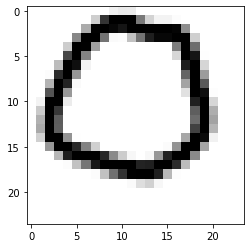

In [8]:
plt.imshow(X_train[2,:,:,0], cmap="gray") 
plt.show()

In [9]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [10]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test_easy, y_test_easy), verbose = 0)

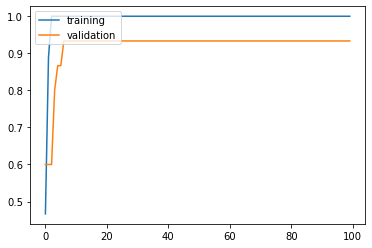

15/15 [==============================] - 0s 663us/step
[0.32688573002815247, 0.9333333373069763]


In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test_easy, y_test_easy)
print(results) # This code provides the tuple consisting of (loss) &  (accuracy).

---

## 더 어려운 데이터인 test데이터들로 하기

In [12]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img1 = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img1
    y_test[i] = 0
    
    img2 = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img2
    y_test[5+i] = 1

    img3 = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img3
    y_test[10+i] = 2

In [13]:
y_test = to_categorical(y_test)
print(X_test.shape,  y_test.shape)

(15, 24, 24) (15, 3)


In [14]:
X_test =  X_test.reshape(-1, 24,24,1)
print(X_test.shape)
print(y_test.shape)

(15, 24, 24, 1)
(15, 3)


In [15]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

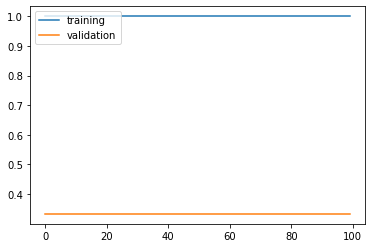

15/15 [==============================] - 0s 998us/step
[20.509639739990234, 0.3333333432674408]


In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)       

## filter가 뭐였는지 알아보기
https://stackoverflow.com/questions/53503389/how-to-set-parameters-in-keras-to-be-non-trainable

In [20]:
for l in model.layers:
    print(l.name)
    print(l.trainable) # 학습을 하는 과정에서 parameter들을 바꾸는 것들 

conv2d_1
True
batch_normalization_1
True
activation_1
True
conv2d_2
True
batch_normalization_2
True
activation_2
True
max_pooling2d_1
True
flatten_1
True
dense_1
True
activation_3
True
dense_2
True


In [25]:
w = model.layers[0].get_weights()     # (0번째 layer의 W가중치 ,0번째 layer의 b가중치)
# print(w[0])   #각 필터들마다의 W 가중치
# print(w[1])   #각 필터들마다의 b 가중치(bias)

print(w[0].shape) # (3,3,1)사이즈의 W가중치가 32개(필터 수) 만큼 있으므로
print(w[1].shape) # bias의 개수
print(w[1][0]) # bias 중에서 0번째    # 다시 말해, 0번째 필터의 bias

print(w[0][:,:,0,0]) # 0번째 필터의 W가중치
print(w[0][:,:,0,1]) # 1번째 필터의 W가중치
print('------------------------------------------------------------------------------------')
print(w)   # (0번째 layer의 W가중치 ,0번째 layer의 b가중치)

(3, 3, 1, 32)
(32,)
0.000100437705
[[-0.05662336  0.02282921 -0.02097232]
 [ 0.10650278 -0.03901119  0.13888502]
 [-0.10200673 -0.04499863 -0.12815918]]
[[-0.02749282  0.06295145  0.0965623 ]
 [ 0.00539425 -0.11324702 -0.14028014]
 [ 0.06051311 -0.1274742   0.05641212]]
------------------------------------------------------------------------------------
[array([[[[-0.05662336, -0.02749282,  0.05110911,  0.0064822 ,
           0.01151013,  0.12071022,  0.1365377 , -0.01809791,
           0.10926956,  0.12975708,  0.08462746, -0.1041393 ,
           0.02677935, -0.12020696,  0.14393413,  0.12967189,
          -0.12027133, -0.11671293, -0.14214933,  0.12016262,
          -0.007021  ,  0.13247877,  0.11201426, -0.02383978,
           0.06743716, -0.14206958,  0.00568481,  0.05681259,
           0.08188222, -0.11275959, -0.07097409, -0.00772815]],

        [[ 0.02282921,  0.06295145,  0.0931593 ,  0.03468673,
           0.10832509, -0.01910006,  0.00957587,  0.11461251,
          -0.0903936

## 밀집 연결 네트워크

밀집 연결 네트워크를 구현하기에는 `Sequential` 모델이 더 적합한 선택이겠지만, 아주 간단한 예시를 위해서 케라스 함수형 API로 구현해 보겠습니다.

- 레이어 인스턴스는 (텐서에 대해) 호출 가능하고, 텐서를 반환합니다.


- 인풋 텐서와 아웃풋 텐서는 `Model`을 정의하는데 사용됩니다.


- 이러한 모델은 케라스 `Sequential` 모델과 완전히 동일한 방식으로 학습됩니다.

출처 : https://keras.io/ko/getting-started/functional-api-guide/

In [31]:
# filter 적용하고 bias까지 다 더해진 상태
print(model.input)
print(model.layers[0].output)

# output이 밑에처럼 나오는데
# <tf.Tensor 'conv2d_1/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>
# 여기서 BiasAdd:0은 bias가 0이 아니라 conv2d_1/BiasAdd 텐서의 이름이 '0'이라는 뜻!

Tensor("conv2d_1_input:0", shape=(?, 24, 24, 1), dtype=float32)
Tensor("conv2d_1/BiasAdd:0", shape=(?, 22, 22, 32), dtype=float32)


### 레이어처럼, 모든 모델이 호출 가능합니다
- 함수형 API를 사용하면 학습된 모델을 재사용하기 편리합니다.


- 어느 모델이든 텐서에 대해 호출하여 레이어처럼 사용할 수 있습니다. 모델을 호출하면 모델의 구조만 재사용하는 것이 아니라 <ins>**가중치까지 재사용되는 것**</ins>임을 참고하십시오.

In [46]:
from keras.models import Model

# 밀집 연결 네트워크를 구현하기에는 Sequential 모델이 더 적합하지만, 간단한 예시를 위해서 케라스 함수형 API로 구현
my_layer_model = Model(inputs=model.input,
                      outputs=model.layers[0].output)    # 그릇이 24 x 24 x 1

output = my_layer_model.predict(X_test)    # predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음



print(model.input.shape)    # (?, 24, 24, 1) : 모델의 input들의 사이즈.
print(X_test.shape)   # X_test는 15개의 (24,24,1)사이즈의 데이터들로 이루어져 있기 때문에 input으로 가능!
print(model.layers[0].output.shape) # (?, 22, 22, 32) : 모델의 0번째 레이어(Conv)의 output 사이즈. 뭘 넣어준 것이 아니기 때문에 대략적인 form만 나온 것
print(output.shape) # X_test를 넣어주고 나서 첫번째 레이어인 Conv만 통과시켰을 때 나온 output

(?, 24, 24, 1)
(15, 24, 24, 1)
(?, 22, 22, 32)
(15, 22, 22, 32)


shape of X_test = (15, 24, 24, 1)
shape of output = (15, 22, 22, 32)


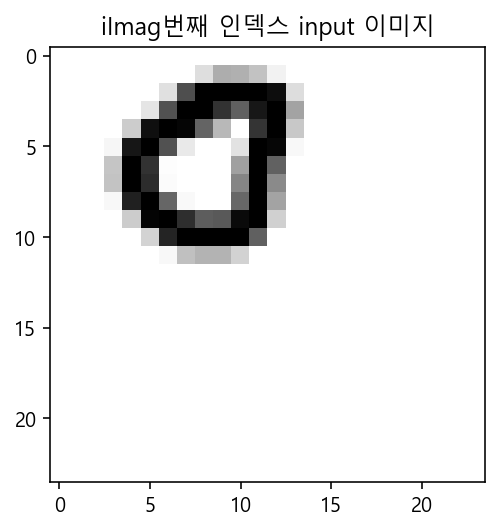

(3, 3)


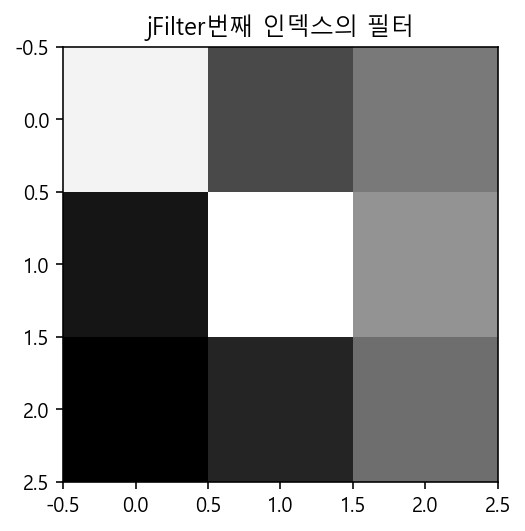

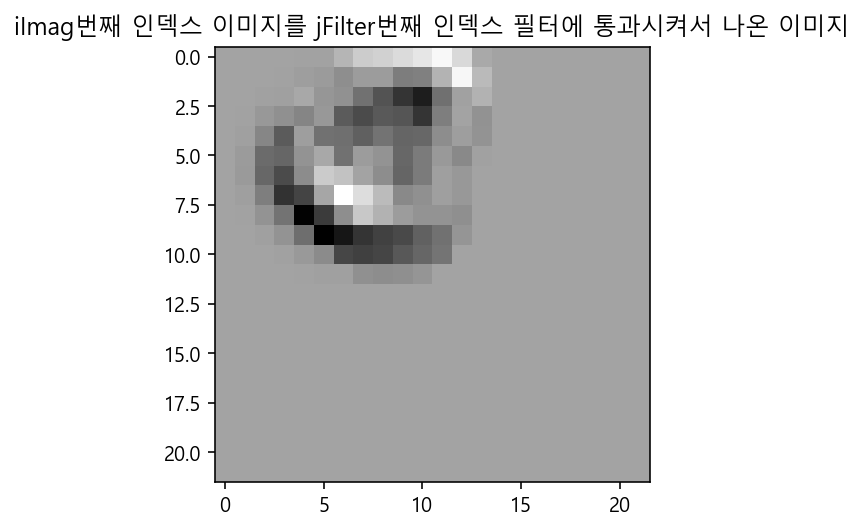

In [87]:
print("shape of X_test =", X_test.shape)  # (15,24,24,1) : 1은 흑백 이미지라서 /  15개의 (24,24,1)사이즈의 이미지가 있다.
print("shape of output =", output.shape) #  (15, 22, 22, 32) : 32는 필터 수 / 15개 input이 32개의 필터를 각각 통과해서 (22,22)사이즈로 변형됌
# X_test[i,:,:,0] --> X_test에서 i번째 인덱스의 이미지 (맨 뒤의 0은 흑백이어서)
# output[i,:,:,j] --> X_test의 i번째 인덱스 이미지를 j번째 인덱스의 필터에 통과시켜서 나온 이미지
# i번째 이미지 / j번째 필터
# # 출력 = (j번째 필터의 W가중치)*(i번째 이미지) + (j번째 필터의 b가중치)


# plt.imshow(X_test[i,:,:,0], cmap='gray')
# plt.show()
# plt.imshow(output[i,:,:,j], cmap='gray')


jFilter = 5
iImg = 1

# iImag번째 인덱스 input 이미지
plt.imshow(X_test[iImg,:,:,0], cmap='gray')
plt.title("iImag번째 인덱스 input 이미지")
plt.show()

# jFilter번째 인덱스의 필터
w = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0,jFilter]
print(f.shape)
plt.imshow(f, cmap='gray')
plt.title("jFilter번째 인덱스의 필터")
plt.show()

# iImag번째 인덱스 이미지를 jFilter번째 인덱스 필터에 통과시켜서 나온 이미지
plt.imshow(output[iImg,:,:,jFilter], cmap='gray')
plt.title("iImag번째 인덱스 이미지를 jFilter번째 인덱스 필터에 통과시켜서 나온 이미지")
plt.show()

In [88]:
# flatten으로 길게 늘어뜨려놓은 영상

my_layer_model = Model(inputs=model.input,
                      outputs=model.layers[7].output)    # 위의 summary에서 flatten이 8번째이므로 index는 7이다.
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)



########################################################################
# 더 나은 방법

my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("flatten_1").output) # 위의 summary에서 올려다보면 flatten의 이름을 보고 알 수 있음
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)

(15, 6400)
(15, 6400)


In [89]:
my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("dense_2").output) # 위의 summary에서 올려다보면 flatten의 이름을 보고 알 수 있음
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)
p = np.argmax(output, axis=1)
T = np.argmax(y_test, axis = 1)

print(p)
print(T)
print('\n')
print("맞춘 개수 = ", np.sum((p == T)*1))
print("인식률 = ", np.sum((p == T)*1)/len(p))

(15, 3)
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


맞춘 개수 =  5
인식률 =  0.3333333333333333
